In [1]:
from qiskit import *

In [2]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)

In [3]:
# Measures the qubits and stores them into classical bits
circuit.measure(qr, cr)

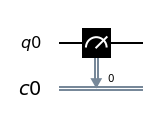

In [5]:
circuit.draw(output = 'mpl')

In [36]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()    # BY default: shots = 1024
counts = result.get_counts(circuit)
print(counts)

{'0': 1024}


In [37]:
# Run on least busy device
from qiskit.providers.ibmq import least_busy
from qiskit import IBMQ

provider = IBMQ.load_account()

# provider = IBMQ.get_provider()
backends = provider.backends(simulator = False)
qcomp = least_busy(backends)
print('Using the least busy device: ', qcomp.name())

ibmqfactory.load_account:WARNING:2020-07-11 20:38:42,514: Credentials are already in use. The existing account in the session will be replaced.


Using the least busy device:  ibmqx2


In [38]:
job = execute(circuit, backend = qcomp)
result = job.result()
counts = result.get_counts()
print(counts)

{'0': 981, '1': 43}
